In [1]:
#from software.Scripts.Statistics import pyStats
import pyStats
from ROOT import TMath;
#import ROOT
#path="/software/Scripts/Statistics/"
#ROOT.gROOT.SetMacroPath(path)

Welcome to JupyROOT 6.30/04


In [2]:
countexp = pyStats.countingExperiment();
countexp.addChannel('myChannel', bkg = 6.86571261029315, bkgUnc = 2.222980093459385, Nobs = 14);
print(countexp);
print("Significance",countexp.getSignificance());

---------------------------
Counting experiment "myCountingExperiment"
---------------------------
Int. luminosity = 1.0 +/- 0.0
---------------------------
Channel "myChannel":
   Background = 6.86571261029315 +/- 2.222980093459385
   Observed events = 14
   Signal efficiency = 1.0 +/- 0.0

Significance 1.6843585799464962


In [3]:
import limitPlot;

limitPlots = {'combined': limitPlot.limitPlot('Combined')};

#peek in the input file to check which channels are there
inputFile = open('inputs.txt','r');
lines = inputFile.readlines();
for l in lines:

    exec(l); #Input file consists of valid Python statements such as mass=300 etc.

    if 'channel=' in l:
        if not channel in limitPlots.keys():
            limitPlots[channel] = limitPlot.limitPlot(channel);

print( 'Will make the following limit plots:' );
print(limitPlots);
            
countexp = {};
xtitle='Mass';
ytitle='Cross section';
yrange=[-999.0,-999.0];

#read the inputs and fill in the respective limit plots with background levels, observed counts, etc. 
f = open('inputs.txt');
for l in f.readlines():

    exec(l); #Input file consists of valid Python statements such as mass=300 etc. 

    if 'mass=' in l: #Such a line defines a new point in the limit plot
        for channel in limitPlots.keys():
            countexp[channel] = pyStats.countingExperiment(name = 'mass = '+str(mass), intLum = intLum, intLumUnc = intLumUncertainty);
            limitPlots[channel].addPoint(mass, countexp[channel], theoryCrossSection);

    if 'channel=' in l: #Such a line gives the inputs for a given channel     
        countexp['combined'].addChannel(name = channel, bkg = background, bkgUnc = backgroundUncertainty, Nobs = Nobs, eff = efficiency, effUnc = efficiencyUncertainty);
        countexp[channel].addChannel(name = channel, bkg = background, bkgUnc = backgroundUncertainty, Nobs = Nobs, eff = efficiency, effUnc = efficiencyUncertainty);

Will make the following limit plots:
{'combined': Limit plot "Combined", 'EEMM': Limit plot "EEMM", '4E': Limit plot "4E", '4M': Limit plot "4M"}


In [4]:
print(limitPlots.keys())

dict_keys(['combined', 'EEMM', '4E', '4M'])


In [5]:
print(limitPlots['combined']);

Limit plot "Combined"

The plot consists of the following points:

x-axis value: 300
theory prediction: 0.277538
---------------------------
Counting experiment "mass = 300"
---------------------------
Int. luminosity = 29049.3 +/- 639.0845999999999
---------------------------
Channel "EEMM":
   Background = 224.54874233760498 +/- 2.361918600412777
   Observed events = 265
   Signal efficiency = 0.04625679781842472 +/- 0.0010104288456429466
Channel "4E":
   Background = 35.98914548608181 +/- 0.9296677207433478
   Observed events = 45
   Signal efficiency = 0.012496101489107365 +/- 0.0005253114058206444
Channel "4M":
   Background = 138.99691217482382 +/- 1.9474988207892292
   Observed events = 146
   Signal efficiency = 0.03946305524087565 +/- 0.0009334818684138943
x-axis value: 400
theory prediction: 0.125793
---------------------------
Counting experiment "mass = 400"
---------------------------
Int. luminosity = 29049.3 +/- 639.0845999999999
---------------------------
Channel "EEMM

In [6]:
limitPlots['combined'].calculate();

limitPlots['4E'].calculate();
limitPlots['4M'].calculate();
limitPlots['EEMM'].calculate();

In [7]:
print(limitPlots['combined']);
limitPlots["combined"].dumpToFile(filename="combined_limits.txt")
limitPlots["4E"].dumpToFile(filename="4E_limits.txt")
limitPlots["4M"].dumpToFile(filename="4M_limits.txt")
limitPlots["EEMM"].dumpToFile(filename="EEMM_limits.txt")
#limitPlots["combined"].dumpToFiles(filename="channel_limits.txt")
#print(limitPlots['4E']);
#print(limitPlots['4M']);
#print(limitPlots['EEMM']);

Limit plot "Combined"

The plot consists of the following points:

x-axis value: 300
theory prediction: 0.277538
---------------------------
Counting experiment "mass = 300"
---------------------------
Int. luminosity = 29049.3 +/- 639.0845999999999
---------------------------
Channel "EEMM":
   Background = 224.54874233760498 +/- 2.361918600412777
   Observed events = 265
   Signal efficiency = 0.04625679781842472 +/- 0.0010104288456429466
Channel "4E":
   Background = 35.98914548608181 +/- 0.9296677207433478
   Observed events = 45
   Signal efficiency = 0.012496101489107365 +/- 0.0005253114058206444
Channel "4M":
   Background = 138.99691217482382 +/- 1.9474988207892292
   Observed events = 146
   Signal efficiency = 0.03946305524087565 +/- 0.0009334818684138943
---------------------------
Limit setting results:
Observed limit: 0.03267475904529345
Expected limit and bands:
  -2sigma                 -1sigma                 median                +1sigma                +2sigma
0.008883

In [8]:
print(0.000124*0.059)

7.316e-06


Info in <TCanvas::Print>: png file limitplot.png has been created


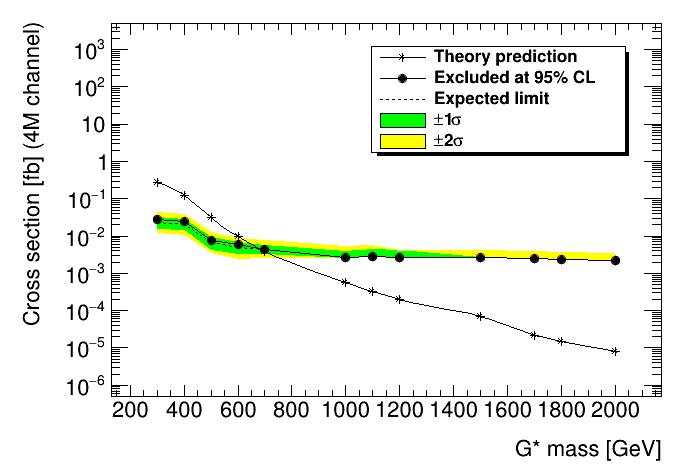

In [9]:
#%jsroot on
#limitPlots['combined'].drawPlot(xtitle="G* mass [GeV]", ytitle="Cross section [fb] (combined channel)", yrange=[5.0e-7,5.0e3]);
#limitPlots['4E'].drawPlot(xtitle="G* mass [GeV]", ytitle="Cross section [fb] (4E channel)", yrange=[5.0e-7,5.0e3]);
limitPlots['4M'].drawPlot(xtitle="G* mass [GeV]", ytitle="Cross section [fb] (4M channel)", yrange=[5.0e-7,5.0e3]);
#limitPlots['EEMM'].drawPlot(xtitle="G* mass [GeV]", ytitle="Cross section [fb] (EEMM channel)", yrange=[5.0e-7,5.0e3]);


#limitPlots['combined'].drawPlot(xtitle="G* mass [GeV]", ytitle="Cross section [fb]", yrange=[1,11]);

In [10]:
f = open('inputs.txt');
inpdic={}
firstline={}
for l in f.readlines():
    exec(l); #Input file consists of valid Python statements such as mass=300 etc.
    if "NmassPoints=" in l:
        firstline["NmassPoints"]=NmassPoints
        firstline["Nchannels"]=Nchannels
        firstline["intLum"]=intLum
        firstline["intLumUncertainty"]=intLumUncertainty
    if "mass=" in l:
        inpdic[mass]={}
    if "channel=" in l:
        inpdic[mass][channel]={}
        inpdic[mass][channel]["efficiency"]=efficiency
        inpdic[mass][channel]["efficiencyUncertainty"]=efficiencyUncertainty
        inpdic[mass][channel]["background"]=background
        inpdic[mass][channel]["backgroundUncertainty"]=backgroundUncertainty
        inpdic[mass][channel]["Nobs"]=Nobs
        

In [11]:
print(inpdic)

{300: {'EEMM': {'efficiency': 0.04625679781842472, 'efficiencyUncertainty': 0.0010104288456429466, 'background': 224.54874233760498, 'backgroundUncertainty': 2.361918600412777, 'Nobs': 265}, '4E': {'efficiency': 0.012496101489107365, 'efficiencyUncertainty': 0.0005253114058206444, 'background': 35.98914548608181, 'backgroundUncertainty': 0.9296677207433478, 'Nobs': 45}, '4M': {'efficiency': 0.03946305524087565, 'efficiencyUncertainty': 0.0009334818684138943, 'background': 138.99691217482382, 'backgroundUncertainty': 1.9474988207892292, 'Nobs': 146}}, 400: {'EEMM': {'efficiency': 0.05102368733103839, 'efficiencyUncertainty': 0.0009490814729115947, 'background': 246.8758195962919, 'backgroundUncertainty': 2.4631056807023737, 'Nobs': 296}, '4E': {'efficiency': 0.015323972492353968, 'efficiencyUncertainty': 0.0005120132557401568, 'background': 26.16842953287667, 'backgroundUncertainty': 0.7867601119098955, 'Nobs': 28}, '4M': {'efficiency': 0.045435370484513335, 'efficiencyUncertainty': 0.0

In [12]:
mass=300
countexp = pyStats.countingExperiment(str(mass), intLum=firstline["intLum"], intLumUnc=firstline["intLumUncertainty"]);
"""
for channel in inpdic[mass].keys():
    countexp.addChannel(channel, bkg = inpdic[mass][channel]["background"], bkgUnc= inpdic[mass][channel]["backgroundUncertainty"], Nobs = inpdic[mass][channel]["Nobs"], eff=inpdic[mass][channel]["efficiency"], effUnc=inpdic[mass][channel]["efficiencyUncertainty"]);
"""
channel="EEMM"
countexp.addChannel(channel, bkg = inpdic[mass][channel]["background"], bkgUnc= inpdic[mass][channel]["backgroundUncertainty"], Nobs = inpdic[mass][channel]["Nobs"], eff=inpdic[mass][channel]["efficiency"], effUnc=inpdic[mass][channel]["efficiencyUncertainty"]);
print(countexp);
print( "Significance = ",countexp.getSignificance() );

---------------------------
Counting experiment "300"
---------------------------
Int. luminosity = 29049.3 +/- 639.0845999999999
---------------------------
Channel "EEMM":
   Background = 224.54874233760498 +/- 2.361918600412777
   Observed events = 265
   Signal efficiency = 0.04625679781842472 +/- 0.0010104288456429466

Significance =  2.4551151124859407


In [13]:
mass=500
print(inpdic[mass][channel]["efficiency"])
print(firstline["intLum"])
print(inpdic[mass][channel]["efficiency"]*firstline["intLum"])

0.052387887177874445
29049.3
1521.831450996228


In [14]:
import numpy as np
mass=300
channel="4E"
backg=inpdic[mass][channel]["background"]
dat=inpdic[mass][channel]["Nobs"]
print(dat)
print(backg)
pValue=0
i=np.linspace(dat,dat+80,1000)

for n in range(dat,dat+80):
    pValue += TMath.Poisson(n,backg)
print(pValue)
print( "Significance = ", TMath.Abs(TMath.NormQuantile(pValue)) ); #convert p-value to significance
"""
for n in range(120,200): #the upper limit is in principle infinite, but we need a cut-off for the calculation
    pValue += TMath.Poisson(n,100.);
print(pValue)
"""

45
35.98914548608181
0.08158145569641995
Significance =  1.3945124538678415


'\nfor n in range(120,200): #the upper limit is in principle infinite, but we need a cut-off for the calculation\n    pValue += TMath.Poisson(n,100.);\nprint(pValue)\n'